# This dataset clean the corpus of each tweet for LDA preparation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
import wordcloud
from nltk.stem import WordNetLemmatizer

## Loading the whole dataset with mentions
In this case we are interested to extract hashtags and do topic modelling to extract topics

In [42]:
troll= pd.read_csv("english_lang_troll_hash.csv")


In [43]:
troll.isnull().sum().sort_values(ascending = False)

hashtags            447
mentions            209
region               21
content               1
Unnamed: 0            0
author                0
language              0
publish_date          0
followers             0
retweet               0
account_category      0
year                  0
dtype: int64

In [44]:
# drop NAs in the text column and update the troll dataframe
troll.dropna(subset = ['content'], inplace = True)

In [46]:
troll['content'].head(10)

0    .@POTUS and @FLOTUS meet with storm survivors ...
1    .@POTUS and @FLOTUS meet with storm survivors ...
2    Please follow @10_gop and ReTweet this request...
3    Please follow @10_gop and ReTweet this request...
4    Please follow @10_gop and ReTweet this request...
5    A heavy police presence can be seen at #Berkel...
6    '@realDonaldTrump Donald Trump's amazing golf ...
7    Hi @brianstelter, remember when you said Trump...
8    '@realDonaldTrump I'm very proud of the way yo...
9    '@realDonaldTrump Thank you for everything you...
Name: content, dtype: object

## Text cleaning 

In [47]:
# define a function that takes in a tweet and throws out the text without the RT.
def remove_retweet(tweet):
    text_only = []
    if len(re.findall("^RT.*?:(.*)", tweet)) > 0:
        text_only.append(re.findall("^RT.*?:(.*)", tweet)[0])
    else:
        text_only.append(tweet)
    return text_only[0]

# extract texts and place in a list
text_only = troll['content'].map(remove_retweet)
text_only.head(10)

0    .@POTUS and @FLOTUS meet with storm survivors ...
1    .@POTUS and @FLOTUS meet with storm survivors ...
2    Please follow @10_gop and ReTweet this request...
3    Please follow @10_gop and ReTweet this request...
4    Please follow @10_gop and ReTweet this request...
5    A heavy police presence can be seen at #Berkel...
6    '@realDonaldTrump Donald Trump's amazing golf ...
7    Hi @brianstelter, remember when you said Trump...
8    '@realDonaldTrump I'm very proud of the way yo...
9    '@realDonaldTrump Thank you for everything you...
Name: content, dtype: object

In [48]:
# this method checks for links and removes these from the tweet provided!
def remove_links(tweet):
    '''Provide a tweet and remove the links from it'''
    text_only = []
    if len(re.findall("(https://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(https://[^\s]+)", "", tweet)
    if len(re.findall("(http://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(http://[^\s]+)", "", tweet)    
    text_only.append(tweet)
    return text_only[0]

text_no_links = text_only.map(remove_links)
text_no_links.head(10)

0    .@POTUS and @FLOTUS meet with storm survivors ...
1    .@POTUS and @FLOTUS meet with storm survivors ...
2    Please follow @10_gop and ReTweet this request...
3    Please follow @10_gop and ReTweet this request...
4    Please follow @10_gop and ReTweet this request...
5    A heavy police presence can be seen at #Berkel...
6    '@realDonaldTrump Donald Trump's amazing golf ...
7    Hi @brianstelter, remember when you said Trump...
8    '@realDonaldTrump I'm very proud of the way yo...
9    '@realDonaldTrump Thank you for everything you...
Name: content, dtype: object

In [49]:
def remove_hashtags(tweet):
    '''Provide a tweet and remove hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        tweet = re.sub("(#[^#\s]+)", "", tweet) 
    hashtags_only.append(tweet)
    return hashtags_only[0]

text_all_removed = text_no_links.map(remove_hashtags)
text_all_removed.head(10)

0    .@POTUS and @FLOTUS meet with storm survivors ...
1    .@POTUS and @FLOTUS meet with storm survivors ...
2    Please follow @10_gop and ReTweet this request...
3    Please follow @10_gop and ReTweet this request...
4    Please follow @10_gop and ReTweet this request...
5    A heavy police presence can be seen at  ahead ...
6    '@realDonaldTrump Donald Trump's amazing golf ...
7    Hi @brianstelter, remember when you said Trump...
8    '@realDonaldTrump I'm very proud of the way yo...
9    '@realDonaldTrump Thank you for everything you...
Name: content, dtype: object

In [50]:
def remove_extraneous(tweet):
    '''Given a text, remove unnecessary characters from the beginning and the end'''
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    tweet = tweet.rstrip(")")
    tweet = tweet.lstrip("(")
    tweet = re.sub("\.", "", tweet)
    return tweet

text_clean = text_all_removed.map(remove_extraneous)
text_clean.head(10)

0    @POTUS and @FLOTUS meet with storm survivors a...
1    @POTUS and @FLOTUS meet with storm survivors a...
2    Please follow @10_gop and ReTweet this request...
3    Please follow @10_gop and ReTweet this request...
4    Please follow @10_gop and ReTweet this request...
5    A heavy police presence can be seen at  ahead ...
6    '@realDonaldTrump Donald Trump's amazing golf ...
7    Hi @brianstelter, remember when you said Trump...
8    '@realDonaldTrump I'm very proud of the way yo...
9    '@realDonaldTrump Thank you for everything you...
Name: content, dtype: object

In [51]:
# Now lets remove the mentions from the tweet text
def remove_mentions(tweet):
    '''Given a text, remove the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        tweet = re.sub('@[^\s@]+', "" , tweet)
        mentions.append(tweet)
    else:
        mentions.append(tweet)
    return mentions[0]

text_clean_final = text_clean.map(remove_mentions)
text_clean_final.head()

0     and  meet with storm survivors and pass out s...
1     and  meet with storm survivors and pass out s...
2    Please follow  and ReTweet this request We can...
3    Please follow  and ReTweet this request We can...
4    Please follow  and ReTweet this request We can...
Name: content, dtype: object

In [52]:
#remove punctuation from text final clean
def remove_punctuation(tweet):
    '''Given a text, remove the punctuation'''
    punctuation_only = []
    if len(re.findall("[^\w\s]", tweet)) > 0:
        tweet = re.sub("[^\w\s]", "", tweet)
        punctuation_only.append(tweet)
    else:
        punctuation_only.append(tweet)
    return punctuation_only[0]
text_clean_final = text_clean_final.map(remove_punctuation)
text_clean_final.head()

0     and  meet with storm survivors and pass out s...
1     and  meet with storm survivors and pass out s...
2    Please follow  and ReTweet this request We can...
3    Please follow  and ReTweet this request We can...
4    Please follow  and ReTweet this request We can...
Name: content, dtype: object

In [53]:
#to lowercase
text_clean_final = text_clean_final.apply(lambda x: x.lower())
text_clean_final.head()

0     and  meet with storm survivors and pass out s...
1     and  meet with storm survivors and pass out s...
2    please follow  and retweet this request we can...
3    please follow  and retweet this request we can...
4    please follow  and retweet this request we can...
Name: content, dtype: object

In [54]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
text_clean_final = text_clean_final.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
text_clean_final.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    meet storm survivors pass supplies church puer...
1    meet storm survivors pass supplies church puer...
2    please follow retweet request allow voices sil...
3    please follow retweet request allow voices sil...
4    please follow retweet request allow voices sil...
Name: content, dtype: object

In [56]:
troll=troll.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) #remove emojis

In [57]:
troll["language"].value_counts()

English    385093
Name: language, dtype: int64

In [58]:
troll["cleaned"]=text_clean_final #assigning the cleaned text to the troll dataframe

In [89]:
#drop na from troll
troll.dropna(inplace=True)

In [59]:
troll.to_csv("clean_text_edges.csv")

## LDA
LDA was done using Knime that helped us to speed up the process, making faster elaboration. 
We chose 15 topics with 20 words for each topic. The algorithm was run for 1000 iterations



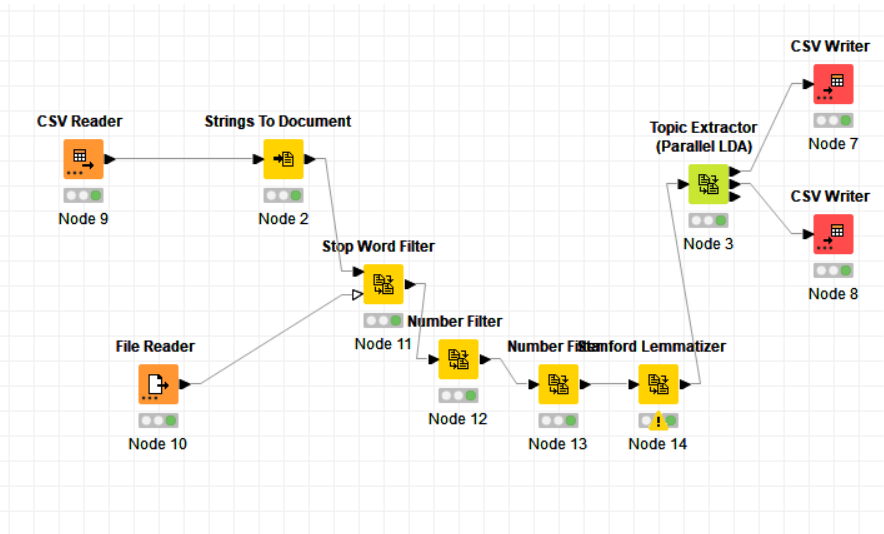

In [11]:
from IPython.display import Image
Image(filename='knime workflow.png')

# Using a smaller dataset from NBC

In [6]:
IRA=pd.read_csv("edge_list_nbc.csv")

In [98]:
IRA

,Source,created_str,text,hashtags,Target,account_category,followers,region,language
0,traceyhappymom,15/08/2016 14:50,RT @mc_derpin: #TheOlderWeGet the more pessimi...,"[""TheOlderWeGet""]",mc_derpin,HashtagGamer,5168.0,United States,English
1,evewebster373,30/06/2015 21:56,RT @dmataconis: Ready To Feel Like A Failure? ...,[],dmataconis,RightTroll,732.0,United States,English
2,jacquelinisbest,18/09/2016 19:46,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,"[""WakeUpAmerica""]",NahBabyNah,RightTroll,2166.0,United States,English
3,judelambertusa,07/04/2016 11:37,RT @mcicero10: #BernieSanders #Trump people sh...,"[""BernieSanders""]",mcicero10,RightTroll,1833.0,United States,English
4,carriethornthon,10/10/2016 21:04,RT @ItsJustJaynie: @HillaryClinton The undecid...,[],ItsJustJaynie,RightTroll,2388.0,United States,English
...,...,...,...,...,...,...,...,...,...
154793,rh0lbr00k,17/09/2016 21:46,RT @eavesdropann: 😂😂😂😳😂😂😂😂 https://t.co/gI6uth...,[],eavesdropann,RightTroll,2020.0,United States,English
154794,malloryjared,19/07/2016 14:49,"RT @USATODAY: This $700 Asus beats a $1,300 Ma...",[],USATODAY,LeftTroll,845.0,United States,English
154795,cookncooks,03/12/2016 03:16,RT @FairyTale_360: 6) Rexnord Bearings is set ...,[],FairyTale_360,RightTroll,1663.0,United States,English
154796,patriotblake,06/02/2017 12:36,RT @bfraser747: 💥💥 #PresidentElectTrump \r\n\r...,[],bfraser747,RightTroll,2190.0,United States,French


In [7]:
#create network and edge list for the network of the IRA nbc dataset
import networkx as nx

G_IRA = nx.from_pandas_edgelist(IRA, source='Source', target='Target',
                                     edge_attr=['created_str', 'account_category', 'language', "region"],
                                        create_using=nx.DiGraph())

In [9]:
#select node attributes
src_attributes = ['followers', 'region', 'language', 'account_category']

# Iterate over df rows and set source node attributes:
for index, row in IRA.iterrows():
    src_attr_dict = {k: row.to_dict()[k] for k in src_attributes}    
    G_IRA.nodes[row['Source']].update(src_attr_dict)

In [10]:
nx.write_gexf(G_IRA , "nbc_IRA.gexf" )